In [53]:
import torchvision.models as models
from torchvision import transforms
import requests
from PIL import Image

In [54]:
LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'

In [55]:
labels = {int(key):value for (key, value)
          in requests.get(LABELS_URL).json().items()}

In [56]:
model =  models.squeezenet1_1(pretrained=True)

/home/r/miniconda3/envs/cat/lib/python3.5/site-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/home/r/miniconda3/envs/cat/lib/python3.5/site-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


quickstart from http://blog.outcome.io/pytorch-quick-start-classifying-an-image/

In [57]:
for name, child in resnet18.named_children():
    for name2, params in child.named_parameters():
        print(name, name2)

conv1 weight
bn1 weight
bn1 bias
layer1 0.conv1.weight
layer1 0.bn1.weight
layer1 0.bn1.bias
layer1 0.conv2.weight
layer1 0.bn2.weight
layer1 0.bn2.bias
layer1 1.conv1.weight
layer1 1.bn1.weight
layer1 1.bn1.bias
layer1 1.conv2.weight
layer1 1.bn2.weight
layer1 1.bn2.bias
layer2 0.conv1.weight
layer2 0.bn1.weight
layer2 0.bn1.bias
layer2 0.conv2.weight
layer2 0.bn2.weight
layer2 0.bn2.bias
layer2 0.downsample.0.weight
layer2 0.downsample.1.weight
layer2 0.downsample.1.bias
layer2 1.conv1.weight
layer2 1.bn1.weight
layer2 1.bn1.bias
layer2 1.conv2.weight
layer2 1.bn2.weight
layer2 1.bn2.bias
layer3 0.conv1.weight
layer3 0.bn1.weight
layer3 0.bn1.bias
layer3 0.conv2.weight
layer3 0.bn2.weight
layer3 0.bn2.bias
layer3 0.downsample.0.weight
layer3 0.downsample.1.weight
layer3 0.downsample.1.bias
layer3 1.conv1.weight
layer3 1.bn1.weight
layer3 1.bn1.bias
layer3 1.conv2.weight
layer3 1.bn2.weight
layer3 1.bn2.bias
layer4 0.conv1.weight
layer4 0.bn1.weight
layer4 0.bn1.bias
layer4 0.conv2.we

We tell the model not to learn or modify the weights / parameters of the model

In [58]:
for param in model.parameters():
    param.requires_grad = False

transforms

In [59]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

In [60]:
image = Image.open("images/w.jpeg")

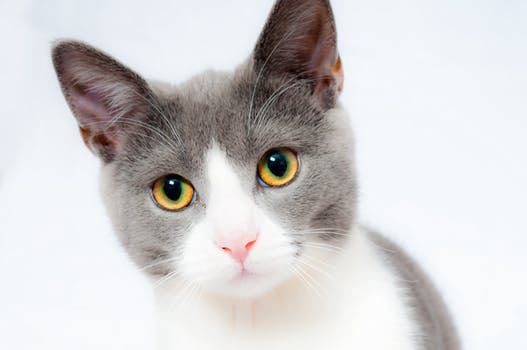

In [74]:
image

In [75]:
img_tensor = preprocess(image)
img_tensor.unsqueeze_(0)

tensor([[[[ 1.8550,  1.8550,  1.8379,  ...,  2.0092,  2.0092,  2.0092],
          [ 1.8550,  1.8550,  1.8379,  ...,  2.0092,  2.0092,  2.0092],
          [ 1.8550,  1.8550,  1.8550,  ...,  1.9920,  1.9920,  1.9920],
          ...,
          [ 2.1462,  2.1462,  2.1290,  ...,  1.5639,  1.4783,  1.3755],
          [ 2.1462,  2.1462,  2.1290,  ...,  1.6153,  1.5297,  1.4440],
          [ 2.1462,  2.1462,  2.1290,  ...,  1.6495,  1.5297,  1.4440]],

         [[ 2.1134,  2.1134,  2.0959,  ...,  2.2360,  2.2360,  2.2360],
          [ 2.1134,  2.1134,  2.0959,  ...,  2.2360,  2.2360,  2.2360],
          [ 2.1134,  2.1134,  2.1134,  ...,  2.2185,  2.2185,  2.2185],
          ...,
          [ 2.3410,  2.3410,  2.3235,  ...,  1.7458,  1.6583,  1.5532],
          [ 2.3410,  2.3410,  2.3235,  ...,  1.7983,  1.7108,  1.6232],
          [ 2.3410,  2.3410,  2.3235,  ...,  1.8333,  1.7108,  1.6232]],

         [[ 2.4308,  2.4308,  2.4134,  ...,  2.5354,  2.5354,  2.5354],
          [ 2.4308,  2.4308,  

In [76]:
fc_out = model(img_variable)

In [77]:
print(labels[fc_out.data.numpy().argmax()])

Egyptian cat


Now I can detect if I indeed have a cat, which I know I do, so in a way, this part was utterly pointless.